In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [16]:
img= cv2.imread("images/1-Saint-Basils-Cathedral.jpg")

In [17]:
img.shape

(600, 394, 3)

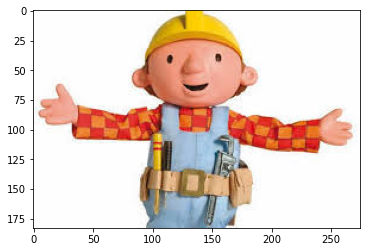

In [14]:
plt.imshow(img)
plt.show()

In [11]:
img= cv2.imread("bob.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

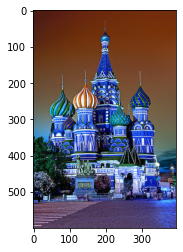

In [18]:
plt.imshow(img)
plt.show()

In [19]:
img.shape

(600, 394, 3)

In [20]:
all_pixels=img.reshape((-1,3))

In [21]:
all_pixels.shape

(236400, 3)

In [22]:
all_pixels.shape

(236400, 3)

In [23]:
from sklearn.cluster import KMeans

In [24]:
k=9
km=KMeans(n_clusters=k)

In [25]:
km.fit(all_pixels)

KMeans(n_clusters=9)

In [26]:
km.cluster_centers_

array([[ 64.49830059,  63.78817208,  97.47832842],
       [217.26358185, 232.66454847, 241.60243444],
       [109.20161465,  50.23573866,  18.1015231 ],
       [103.64693737, 111.44081211, 131.38049356],
       [ 13.2077171 ,  23.68246745,  28.87681709],
       [142.54156954, 167.74071484, 211.22455322],
       [ 53.10570679, 108.79564186, 225.59927572],
       [115.71994314,  84.00195471,  54.992105  ],
       [ 18.01086102,  40.92182922, 170.84130046]])

In [27]:
centers=np.array(km.cluster_centers_,dtype="uint")
#uint8 to represent number btw 0-255 8 bit integer is sufficient 

In [28]:
centers

array([[ 64,  63,  97],
       [217, 232, 241],
       [109,  50,  18],
       [103, 111, 131],
       [ 13,  23,  28],
       [142, 167, 211],
       [ 53, 108, 225],
       [115,  84,  54],
       [ 18,  40, 170]], dtype=uint32)

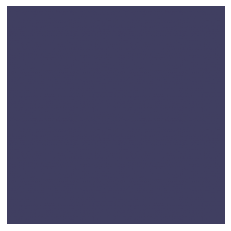

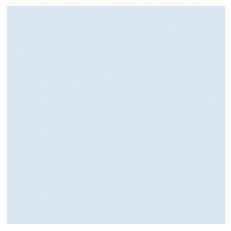

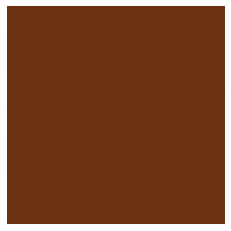

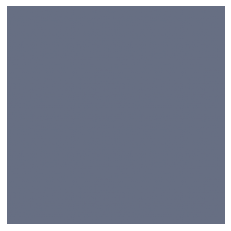

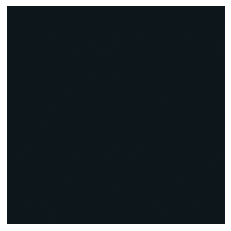

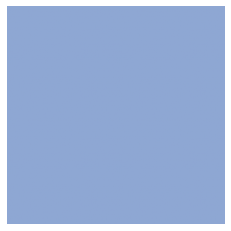

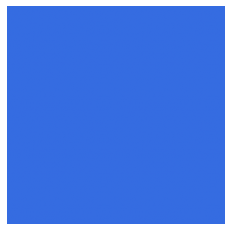

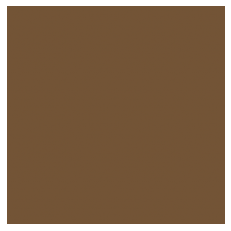

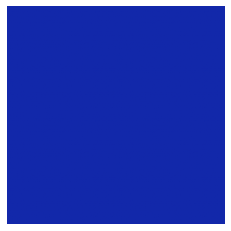

In [29]:
for c in centers:
    a=np.zeros((100,100,3))
    a[:,:,:]=c
    
    plt.imshow(a/255)
    plt.axis("off")
    plt.show()

In [30]:
km.labels_

array([2, 2, 2, ..., 6, 0, 0])

In [31]:
new_img = np.zeros((all_pixels.shape[0], 3), dtype="uint")


In [32]:
new_img.shape


(236400, 3)

In [33]:
# giving appropriate colors to the pixel/data points of new image
for ix in range(all_pixels.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]

In [34]:
new_img


array([[109,  50,  18],
       [109,  50,  18],
       [109,  50,  18],
       ...,
       [ 53, 108, 225],
       [ 64,  63,  97],
       [ 64,  63,  97]], dtype=uint32)

In [35]:
new_img.shape


(236400, 3)

In [36]:
new_img = new_img.reshape((3))


ValueError: cannot reshape array of size 709200 into shape (183,275,3)

In [ ]:
plt.imshow(new_img)
plt.show()

In [ ]:
bar = plot_colors(hist, km.cluster_centers_)
# show our color bart
plt.imshow(img)
plt.axis("off")
plt.imshow(bar)
plt.show()

In [ ]:
numLabels = np.arange(0, len(np.unique(km.labels_)) + 1)

(hist, _) = np.histogram(km.labels_, bins = numLabels)
# normalize the histogram, such that it sums to one
hist = hist.astype("float")
hist /= hist.sum()
       

In [37]:
def plot_colors(hist, centroids):
        # initialize the bar chart representing the relative frequency
        # of each of the colors
        bar = np.zeros((50, 300, 3), dtype = "uint8")
        startX = 0
        # loop over the percentage of each cluster and the color of
        # each cluster
        for (percent, color) in zip(hist, centroids):
            #The zip() function returns an 
            #iterator of tuples based on the iterable objects
            # plot the relative percentage of each cluster
            #zip() returns an iterator of 
            #tuples with each tuple having only one element.
            endX = startX + (percent * 300)
            cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                color.astype("uint8").tolist(), -1)
            startX = endX

        # return the bar chart
        return bar